In [1133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [1134]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [1135]:
# Combine the data into a single DataFrame

merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')

# Display the data table for preview

merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [1136]:
# Checking the number of mice.
mouse_ID = merge_df['Mouse ID'].value_counts()
pd.DataFrame(mouse_ID)

,count
Mouse ID,
g989,13
k403,10
j365,10
j984,10
k210,10
...,...
v199,1
t573,1
f932,1


In [1137]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [1138]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_index = merge_df.loc[merge_df['Mouse ID'] == 'g989', :].index
duplicate_index

Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [1139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop(duplicate_index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [1140]:
# Checking the number of mice in the clean DataFrame.
clean_df.groupby('Mouse ID').size()

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 248, dtype: int64

In [1141]:
clean_df.groupby('Drug Regimen')['Mouse ID'].value_counts()


Drug Regimen  Mouse ID
Capomulin     b128        10
              b742        10
              g288        10
              g316        10
              i557        10
                          ..
Zoniferol     x613         4
              d164         3
              f394         2
              w140         2
              d133         1
Name: count, Length: 248, dtype: int64

## Summary Statistics

In [1142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

tumor_vol = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

tumor_mean = tumor_vol.mean()
tumor_median = tumor_vol.median()
tumor_variance = tumor_vol.var()
tumor_std = tumor_vol.std()
tumor_sem = tumor_vol.sem()

tumor_df = pd.DataFrame({
    "Mean": tumor_mean,
    "Median": tumor_median,
    "Variance": tumor_variance,
    "Standard Dev": tumor_std,
    "Sem": tumor_sem})

tumor_df

,Mean,Median,Variance,Standard Dev,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [1143]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

pd.DataFrame(summary_stats)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [1144]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Filter down the dataframe
filtered_data = clean_df[['Drug Regimen', 'Mouse ID', 'Timepoint']]

#Get total for each drug regimen
drug_regimen_data = filtered_data['Drug Regimen'].value_counts()

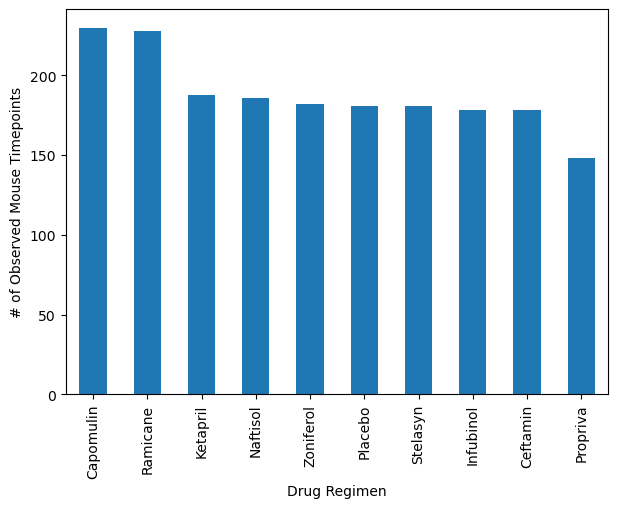

In [1145]:
#Configure bar chart
figure1 = drug_regimen_data.plot(kind='bar', figsize=(7,5),
                                 ylabel='# of Observed Mouse Timepoints')

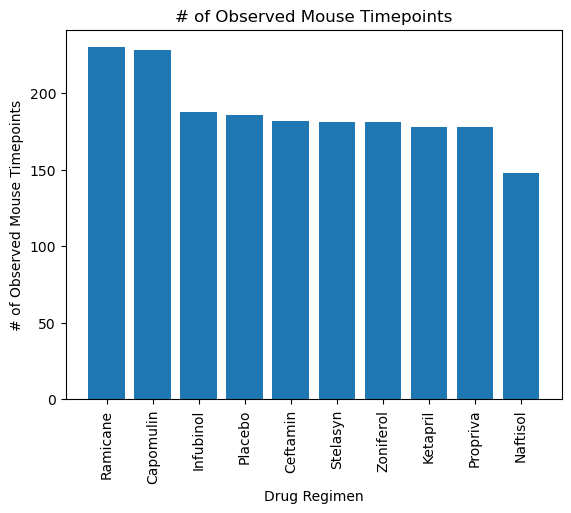

In [1146]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

drug = filtered_data['Drug Regimen'].value_counts()
x_axis = filtered_data['Drug Regimen'].unique()

plt.bar(x_axis, drug, )
plt.title('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], rotation='vertical')
plt.show()

<Axes: ylabel='count'>

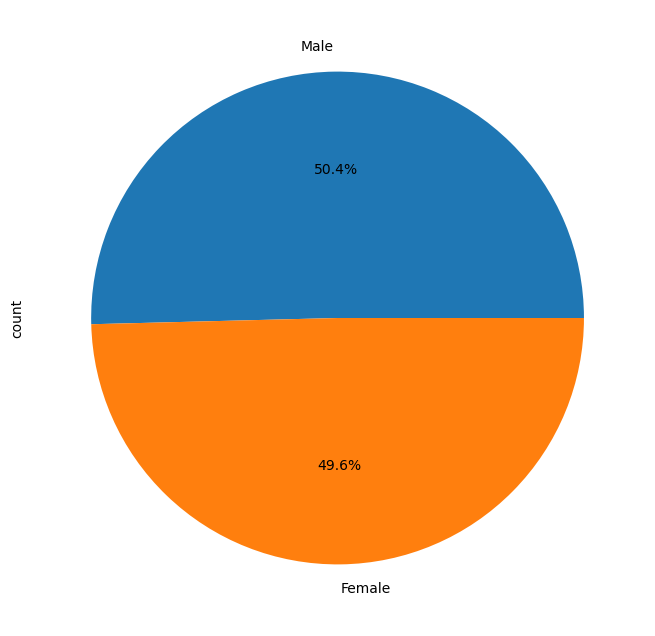

In [1147]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender
gender_data = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()


# Make the pie chart
gender_data.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))

In [1148]:
gender_data

Sex
Male      125
Female    123
Name: count, dtype: int64

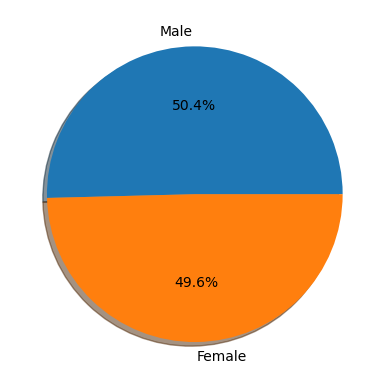

In [1149]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_data = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
labels = ['Male', 'Female']
# Make the pie chart
plt.pie(gender_data, labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()

## Quartiles, Outliers and Boxplots

In [1167]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df.reset_index()


# # # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_dataframe = pd.merge(clean_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_type = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

final_tumor_vol = []

In [ ]:
for type in treatment_type:
    treatment_type = new_dataframe.loc[new_dataframe['Drug Regimen'] == type]['Tumor Volume (mm3)']
    final_tumor_vol.append(treatment_type)
    
# # #Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles = treatment_type.quantile([.25, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr
    
    outliers = treatment_type[(treatment_type < lower_bound) | (treatment_type > upper_bound)]
    
    if len(outliers) == 0:
        print(f"Type: {type}, Potential outliers: None")
    else:
        print(f"Type: {type}, Potential outliers: {outliers.values}")


Type: Capomulin, Potential outliers: None
Type: Ramicane, Potential outliers: None
Type: Infubinol, Potential outliers: [36.3213458]
Type: Ceftamin, Potential outliers: None


In [1153]:
print(len(treatment_type))

25


In [1154]:
# for type in treatment_type:
#     treatment_type = new_dataframe[new_dataframe['Drug Regimen'] == type]['Tumor Volume (mm3)']
#     final_tumor_vol.append(treatment_type)

# #Calculate the IQR and quantitatively determine if there are any potential outliers.

#     quartiles = treatment_type.quantile([.25, .5, .75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq - lowerq

#     lower_bound = lowerq - 1.5 * iqr
#     upper_bound = upperq + 1.5 * iqr
    
#     outliers = treatment_type[(treatment_type < lower_bound) | (treatment_type > upper_bound)]
    
#     if len(outliers) == 0:
#         print(f"Type: {type}, Potential outliers: None")
#     else:
#         print(f"Type: {type}, Potential outliers: {outliers.values}")
      

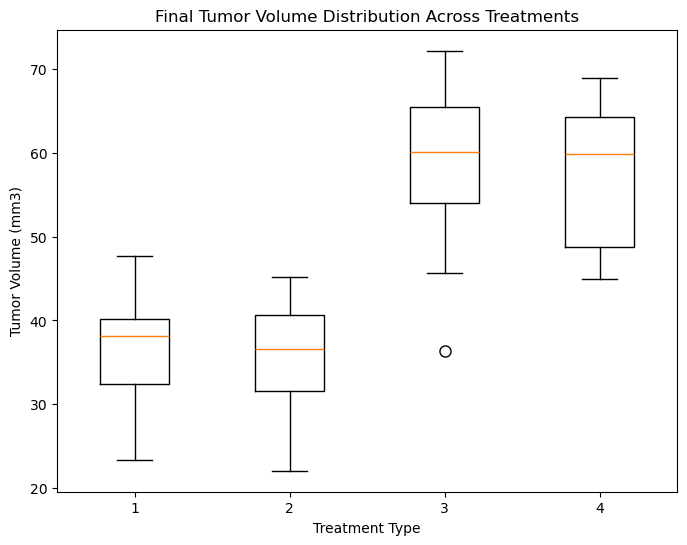

In [1165]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(final_tumor_vol, flierprops=dict(marker='o', color='r', markersize=8))
ax.set_title('Final Tumor Volume Distribution Across Treatments')
ax.set_xlabel('Treatment Type')
ax.set_ylabel('Tumor Volume (mm3)')

# Display plot
plt.show()  

In [1156]:
    #Locate the rows which contain mice on each drug and get the tumor volumes


    #add subset


    #Determine outliers using upper and lower bounds


In [1157]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line Plot  

In [1158]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Find all the mice treated with capomulin and selecting the first one
capomulin_mice = clean_df[clean_df['Drug Regimen'] ==  'Capomulin']
capomulin_mice['Mouse ID'].unique()[0]

's185'

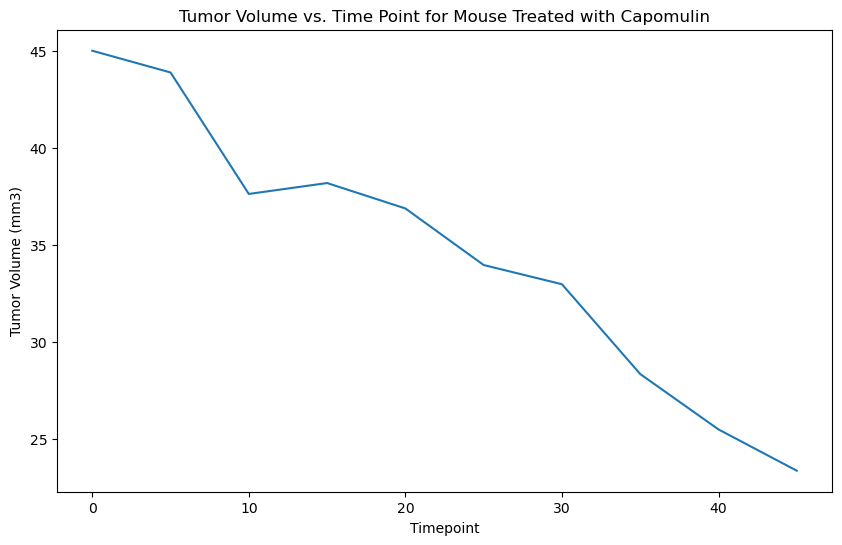

In [1159]:
mouse_information = capomulin_mice[capomulin_mice['Mouse ID'] == 's185']
tumor_vs_timepoint = mouse_information['Tumor Volume (mm3)'], mouse_information['Timepoint'].reset_index
plt.figure(figsize=(10,6))
plt.plot(mouse_information['Timepoint'], mouse_information['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume vs. Time Point for Mouse Treated with Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


# Display the plot
plt.show()

Text(0.5, 1.0, 'Capomulin regimen')

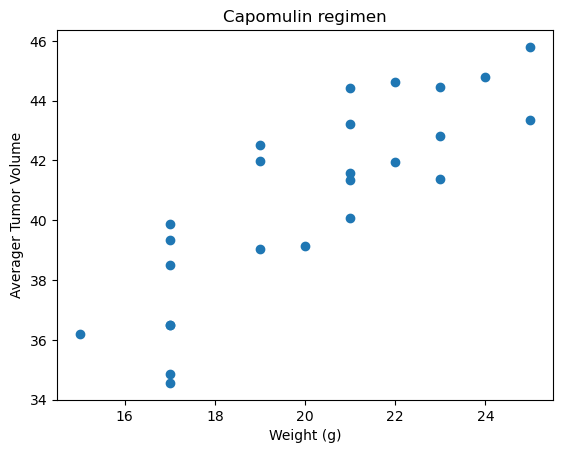

In [1160]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_information = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
# # average_cap_tumor = capomulin_information[capomulin_information['Tumor Volume (mm3)']].mean()['Mouse ID']
# mouse_weight = capomulin_information['Mouse ID']

# Group by Mouse ID to get the average tumor volume for each mouse and merge with the mouse weight
average_cap_tumor = capomulin_information.groupby('Mouse ID').agg(
    avg_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    weight=('Weight (g)', 'first')  # Assuming 'Weight (g)' is a column in clean_df
).reset_index()

plt.scatter(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Averager Tumor Volume')
plt.title('Capomulin regimen')

In [1161]:
from scipy import stats

The correlation coefficient is 0.84


Text(0.5, 1.0, 'Capomulin regimen')

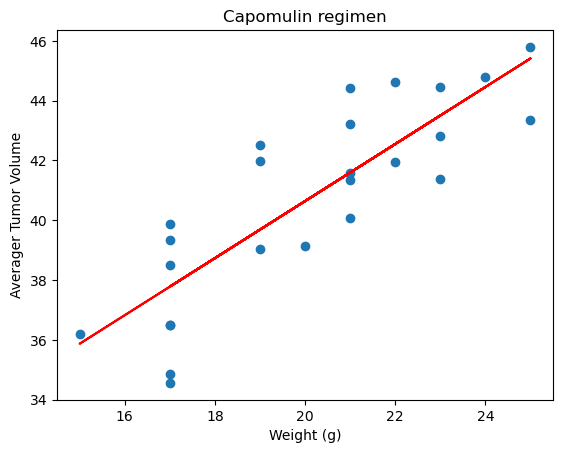

In [1162]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient is {round(st.pearsonr(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])[0],2)}")
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])
pe_fit = pe_slope * average_cap_tumor['weight'] + pe_int
plt.plot(average_cap_tumor['weight'],pe_fit, color='red')
plt.scatter(average_cap_tumor['weight'], average_cap_tumor['avg_tumor_volume'])
plt.xlabel('Weight (g)')
plt.ylabel('Averager Tumor Volume')
plt.title('Capomulin regimen')